In [1]:
import numpy as np
import scipy as sp
import pandas as pd

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


<h1> <font face = "Times"; size = 15; color = "#13D581"> Skewness </font> </h1>

**Skewness** is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images.

A distribution can have *right (or positive)*, *left (or negative)*, or *zero skewness*. A right-skewed distribution is longer on the right side of its peak, and a left-skewed distribution is longer on the left side of its peak:

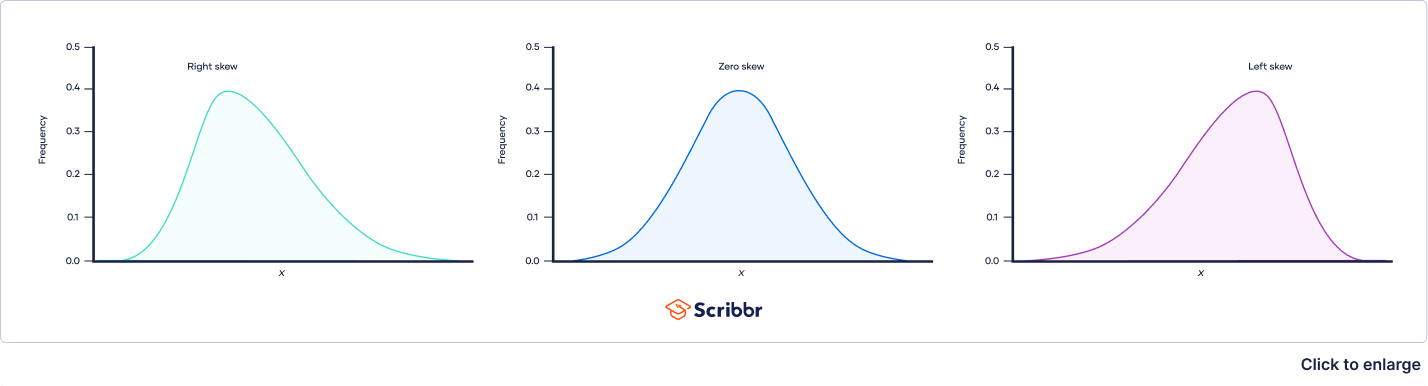

To calculate the skewness of a distribution to:

- Describe the distribution of a variable alongside other descriptive statistics
- Determine if a variable is normally distributed. A normal distribution has zero skew and is an assumption of many statistical procedures.

<h2> <font face = "Verdana"; color = "#3CB371"> 1. Zero Skewness </font> </h2>

When a distribution has zero skew, it is symmetrical. Its left and right sides are mirror images.

Normal distributions have zero skew, but they’re not the only distributions with zero skew. Any symmetrical distribution, such as a uniform distribution or some bimodal (two-peak) distributions, will also have zero skew.

The easiest way to check if a variable has a skewed distribution is to plot it in a histogram. 

In [122]:
mu = 0
variance = 1
sigma = np.math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y = sp.stats.norm.pdf(x, mu, sigma)

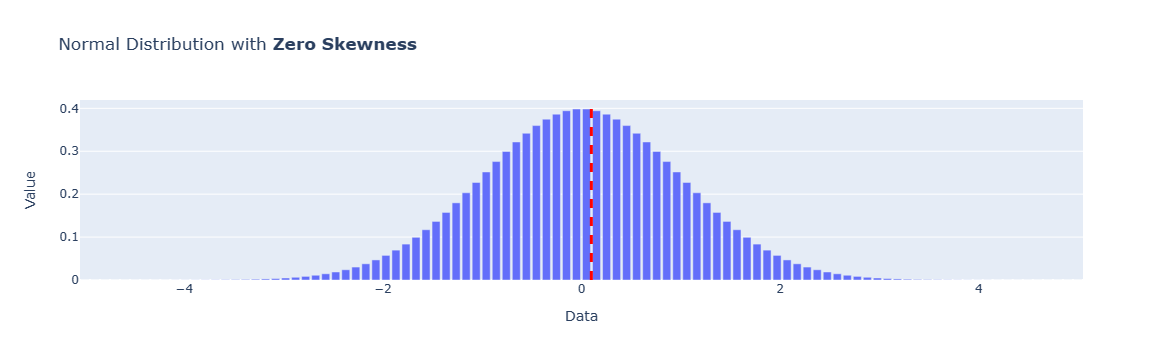

In [123]:
trace = go.Bar(x= x, y=y, name = "y")

fig = go.Figure( data = [trace], layout = {'title':"Normal Distribution with <b>Zero Skewness</b>", 
                                           'xaxis': {'title': 'Data'},
                                          'yaxis': {'title': 'Value'}})
fig.add_vline(x=np.mean(y), line_width=3, line_dash="dash", line_color="red")
fig.show()

**In a distribution with zero skew, the mean and median are equal**. Although a theoretical distribution (e.g., the z distribution) can have zero skew, real data almost always have at least a bit of skew. However, if a distribution is close to being symmetrical, it usually is considered to have zero skew for practical purposes, such as verifying model assumptions.

<h2> <font face = "Verdana"; color = "#3CB371"> 2. Positive Skewness </font> </h2>

A right-skewed distribution is longer on the right side of its peak than on its left. Right skew is also referred to as positive skew.

A tail is a long, tapering end of a distribution. It indicates that there are observations at one of the extreme ends of the distribution, but that they’re relatively infrequent. A right-skewed distribution has a long tail on its right side.

The mean of a right-skewed distribution is almost always greater than its median. That’s because extreme values (the values in the tail) affect the mean more than the median.

In [126]:
dat = sp.stats.skewnorm.rvs(6,loc=0, size = 1000)

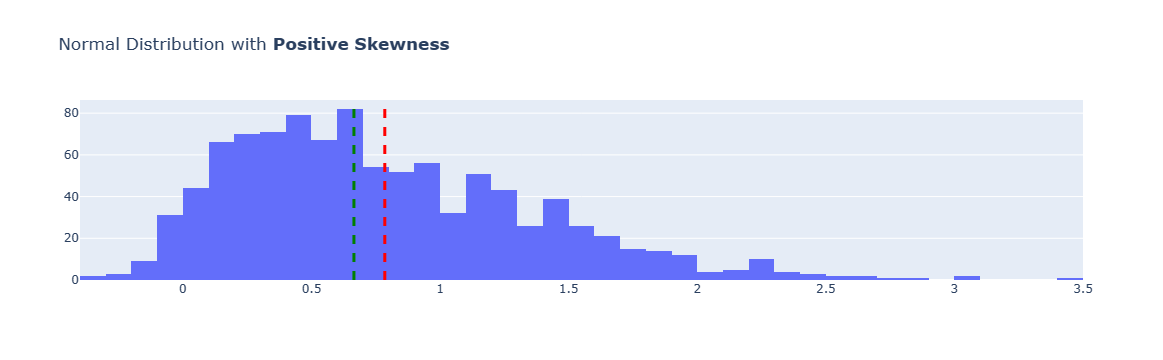

In [128]:
trace = go.Histogram(x = dat)

fig = go.Figure( data = [trace], layout = {'title':"Normal Distribution with <b>Positive Skewness</b>"})
fig.add_vline(x=np.mean(dat), line_width=3, line_dash="dash", line_color="red")
fig.add_vline(x=np.median(dat), line_width=3, line_dash="dash", line_color="green")
fig.show()

<h2> <font face = "Verdana"; color = "#3CB371"> 3. Negative Skewness </font> </h2>

A left-skewed distribution is longer on the left side of its peak than on its right. In other words, a left-skewed distribution has a long tail on its left side. Left skew is also referred to as negative skew.

The mean of a left-skewed distribution is almost always less than its median.

In [129]:
dat = sp.stats.skewnorm.rvs(-6,loc=0, size = 1000)

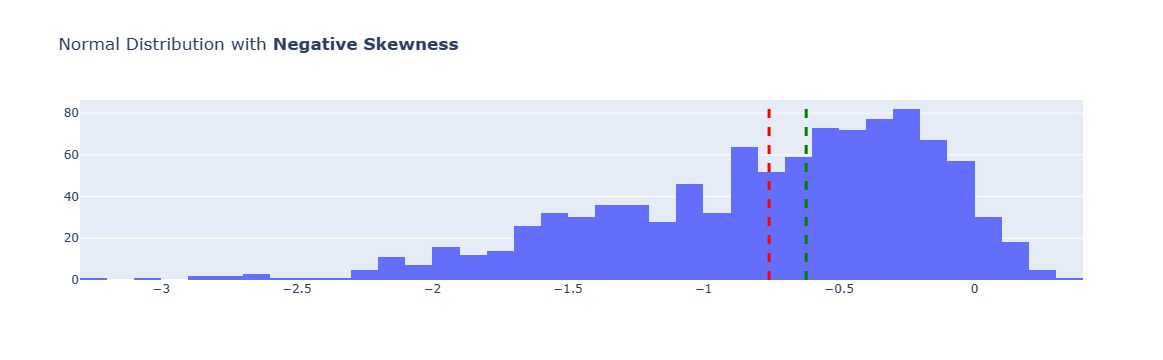

In [131]:
trace = go.Histogram(x = dat)

fig = go.Figure( data = [trace], layout = {'title':"Normal Distribution with <b>Negative Skewness</b>"})
fig.add_vline(x=np.mean(dat), line_width=3, line_dash="dash", line_color="red")
fig.add_vline(x=np.median(dat), line_width=3, line_dash="dash", line_color="green")
fig.show()

<h2> <font face = "Gothic"; color = "#DC143C"> 4. Treatments for Skewness </font> </h2>

Many statistical procedures assume that variables or residuals are normally distributed. Skew is a common way that a distribution can differ from a normal distribution.

Generally, we have three choices if your statistical procedure requires a normal distribution and your data is skewed:

- Do nothing. Many statistical tests, including t tests, ANOVAs, and linear regressions, aren’t very sensitive to skewed data. Especially if the skew is mild or moderate, it may be best to ignore it.
- Use a different model. You may want to choose a model that doesn’t assume a normal distribution. Non-parametric tests or generalized linear models could be more appropriate for your data.
- Transform the variable. Another option is to transform a skewed variable so that it’s less skewed. “Transform” means to apply the same function to all the observations of a variable.

In [172]:
pdata = np.random.exponential(scale=1, size=1000)
ndata = -np.random.exponential(scale=4, size=1000)

In [174]:
for i in [pdata, ndata]:
    print(sp.stats.skew(i), np.mean(i), np.median(i))

2.5845345140450178 1.0033665777035163 0.6886826397393313
-1.7675026083945509 -4.128371556671791 -2.880733218913325


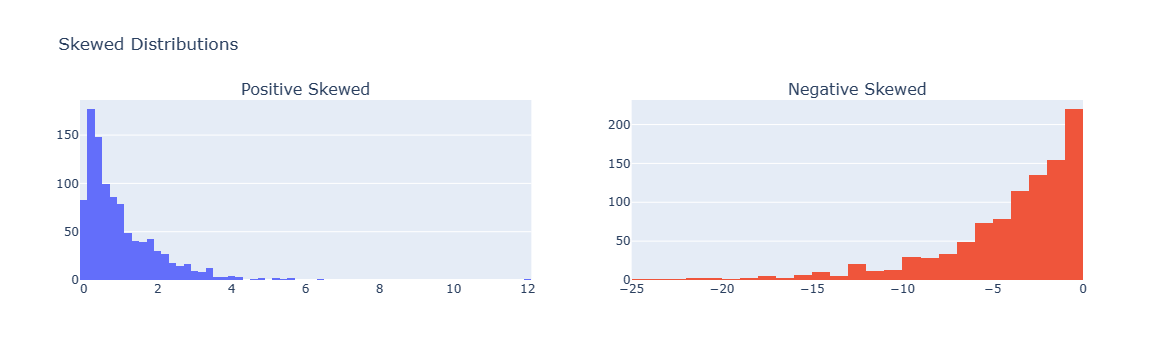

In [175]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Positive Skewed", "Negative Skewed"))

histogram1 = go.Histogram(x=pdata, name="Data 1")
histogram2 = go.Histogram(x=ndata, name="Data 2")

fig.add_trace(histogram1, row=1, col=1)
fig.add_trace(histogram2, row=1, col=2)

fig.update_layout(title_text="Skewed Distributions", showlegend=False)

fig.show()

## 4.1 Square root / Cube root

In [181]:
sq_p = np.sqrt(pdata)
sq_n = np.sqrt(np.abs(ndata))
cr_p = np.cbrt(pdata)
cr_n = np.cbrt(ndata)

In [182]:
for i in [sq_p, sq_n, cr_p, cr_n]:
    print(sp.stats.skew(i), np.mean(i), np.median(i))

0.6980593979316075 0.887686515840658 0.8298690490979075
0.5973324157416564 1.8032909724078785 1.6972720868415152
0.22033613846796302 0.894346068675276 0.8830928696954523
-0.15246325994531634 -1.434437435369695 -1.4228779016861433


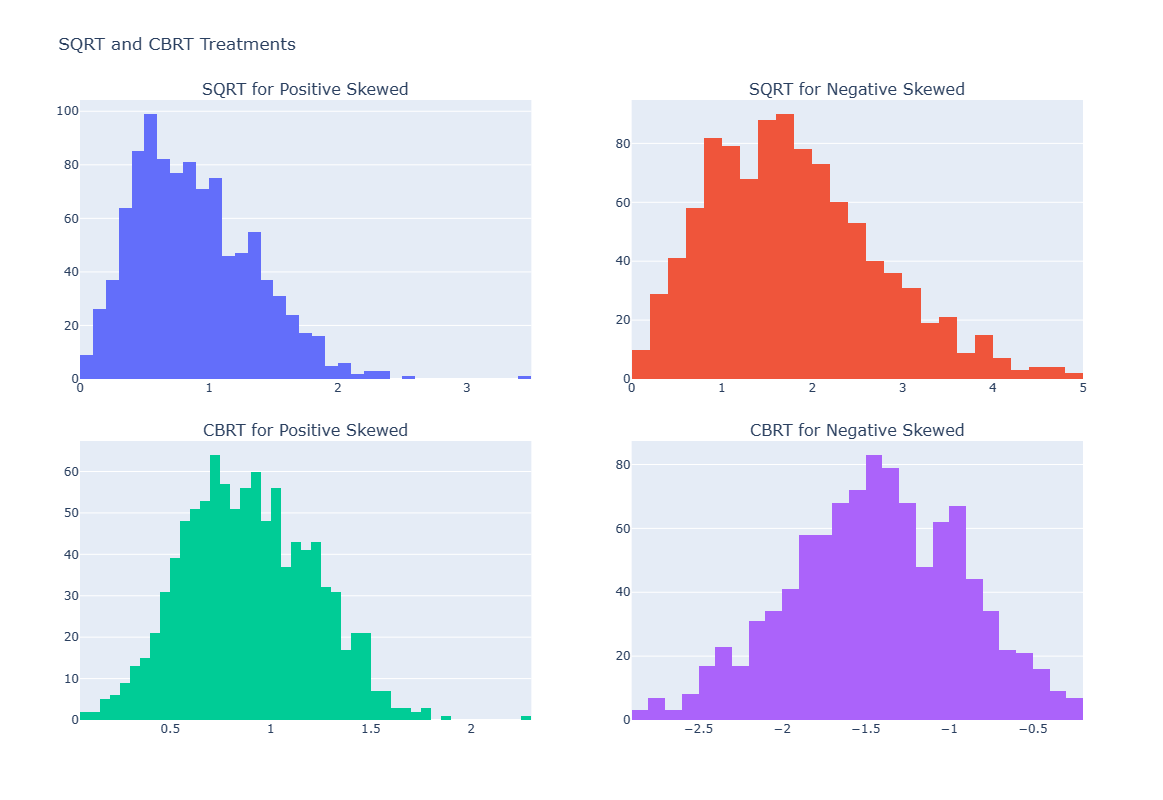

In [187]:
fig = make_subplots(rows=2, cols=2, vertical_spacing = 0.1,
                    subplot_titles=("SQRT for Positive Skewed", "SQRT for Negative Skewed","CBRT for Positive Skewed", "CBRT for Negative Skewed"))

histogram1 = go.Histogram(x=sq_p, name="Data 1")
histogram2 = go.Histogram(x=sq_n, name="Data 2")
histogram3 = go.Histogram(x=cr_p, name="Data 3")
histogram4 = go.Histogram(x=cr_n, name="Data 4")

fig.add_trace(histogram1, row=1, col=1)
fig.add_trace(histogram2, row=1, col=2)
fig.add_trace(histogram3, row=2, col=1)
fig.add_trace(histogram4, row=2, col=2)

fig.update_layout(title_text="SQRT and CBRT Treatments", showlegend=False, height = 800)

fig.show()

## 4.2 Logarithmic Treatment

In [189]:
l_p = np.log(pdata)
l_n = np.log(np.abs(ndata))

In [190]:
for i in [l_p, l_n]:
    print(sp.stats.skew(i), np.mean(i), np.median(i))

-1.1175467231233065 -0.5667373310309708 -0.37297472720084973
-1.0400203806946078 0.8484841764297842 1.0580443780565605


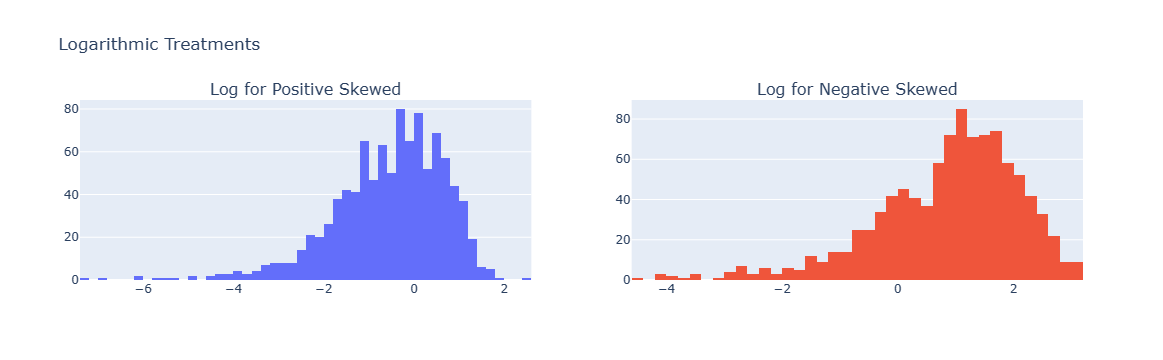

In [191]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Log for Positive Skewed", "Log for Negative Skewed"))

histogram1 = go.Histogram(x=l_p, name="Data 1")
histogram2 = go.Histogram(x=l_n, name="Data 2")

fig.add_trace(histogram1, row=1, col=1)
fig.add_trace(histogram2, row=1, col=2)

fig.update_layout(title_text="Logarithmic Treatments", showlegend=False)

fig.show()

In [197]:
s = {'a': 1, 'b': 2, 'c': 3}

In [198]:
if 'c' not in s.keys():
    print('no')
else:
    print('yes')

yes


## 4.3 Box-cox Treatment

In [201]:
bc_p, _ = sp.stats.boxcox(pdata)
bc_n, _ = sp.stats.boxcox(np.abs(ndata))

In [202]:
for i in [bc_p, bc_n]:
    print(sp.stats.skew(i), np.mean(i), np.median(i))

-0.02716551537981712 -0.36723703814563413 -0.35590883245512916
-0.042075849220936115 1.1999741899004734 1.222874982702588


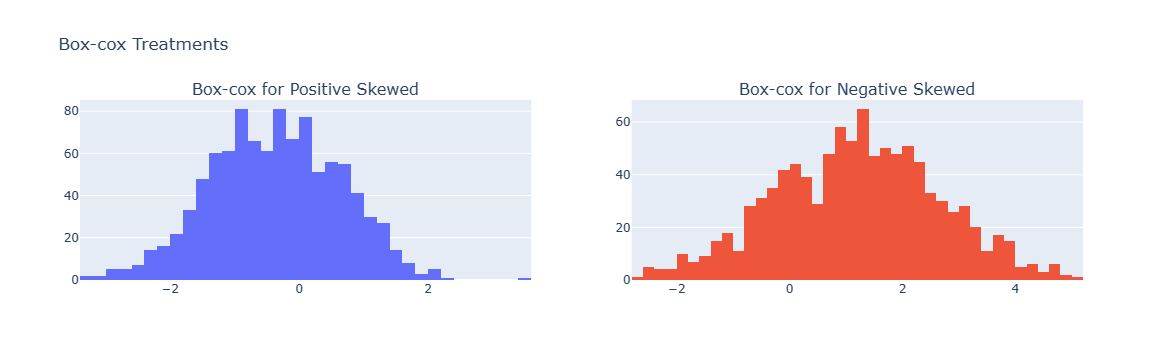

In [203]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Box-cox for Positive Skewed", "Box-cox for Negative Skewed"))

histogram1 = go.Histogram(x=bc_p, name="Data 1")
histogram2 = go.Histogram(x=bc_n, name="Data 2")

fig.add_trace(histogram1, row=1, col=1)
fig.add_trace(histogram2, row=1, col=2)

fig.update_layout(title_text="Box-cox Treatments", showlegend=False)

fig.show()

## 4.4 Winsorization

In [204]:
lower_percentile = 5
upper_percentile = 95

In [205]:
lt_p = np.percentile(pdata, lower_percentile)
ut_p = np.percentile(pdata, upper_percentile)
lt_n = np.percentile(ndata, lower_percentile)
ut_n = np.percentile(ndata, upper_percentile)

In [206]:
w_p = np.clip(pdata, lt_p, ut_p)
w_n = np.clip(ndata, lt_n, ut_n)

In [208]:
for i in [w_p, w_n]:
    print(sp.stats.skew(i), np.mean(i), np.median(i))

1.0150156552773058 0.9555855080279716 0.6886826397393313
-1.100215800066271 -3.9490893402504126 -2.880733218913325


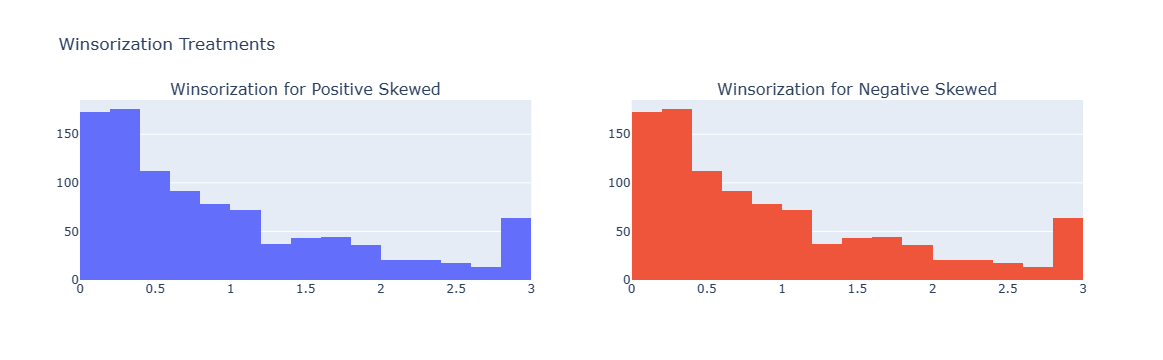

In [207]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Winsorization for Positive Skewed", "Winsorization for Negative Skewed"))

histogram1 = go.Histogram(x=w_p, name="Data 1")
histogram2 = go.Histogram(x=w_p, name="Data 2")

fig.add_trace(histogram1, row=1, col=1)
fig.add_trace(histogram2, row=1, col=2)

fig.update_layout(title_text="Winsorization Treatments", showlegend=False)

fig.show()

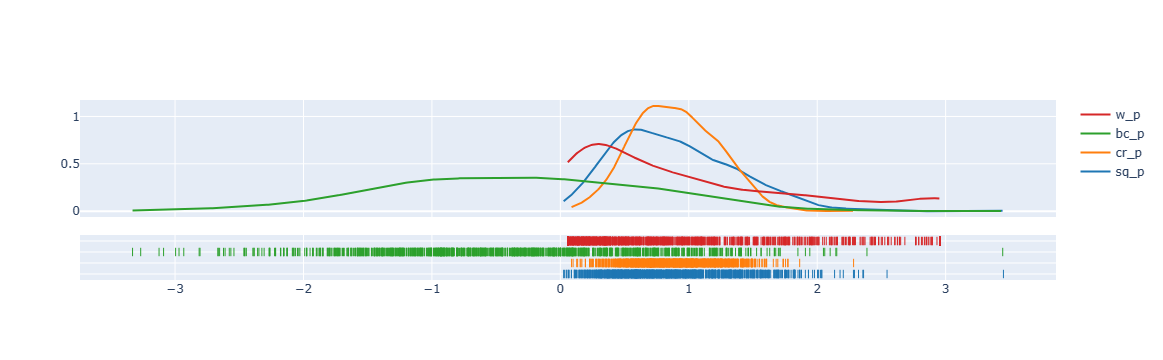

In [213]:
fig2 = ff.create_distplot([sq_p, cr_p, bc_p, w_p],["sq_p","cr_p","bc_p","w_p"], show_hist = False)
fig2.show()

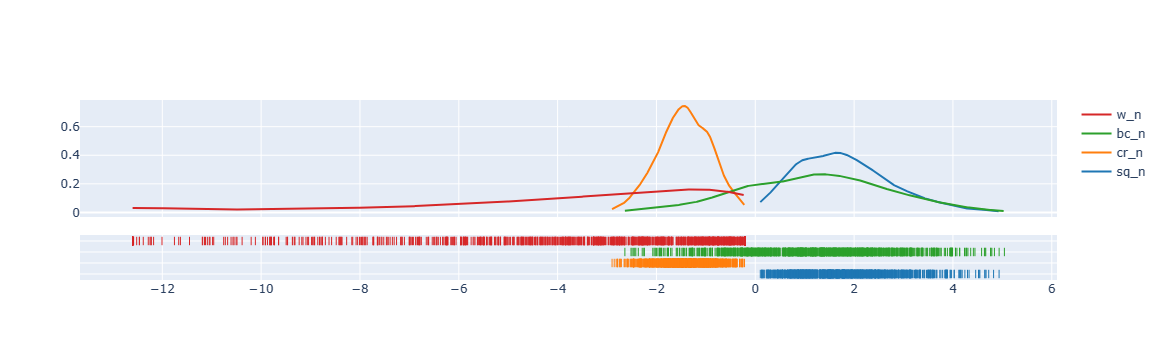

In [214]:
fig2 = ff.create_distplot([sq_n, cr_n, bc_n, w_n],["sq_n","cr_n","bc_n","w_n"], show_hist = False)
fig2.show()

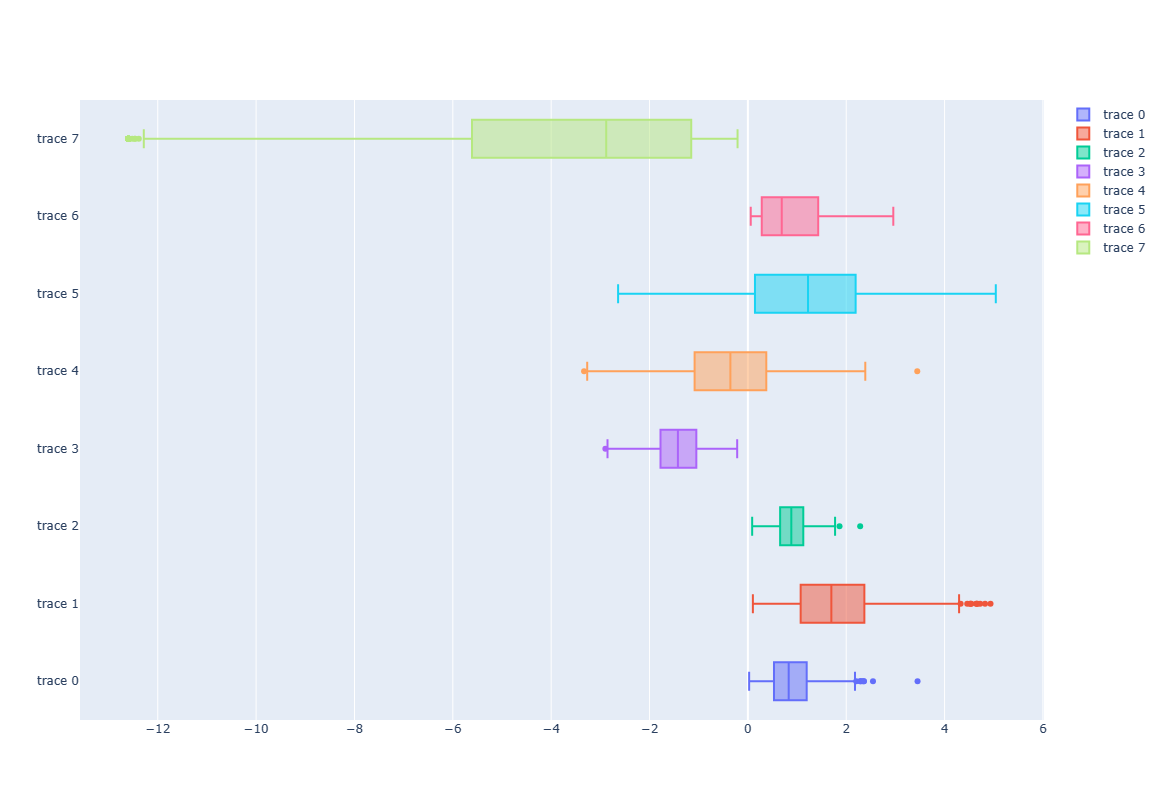

In [222]:
trace = go.Box(x=sq_p)
trace1 = go.Box(x=sq_n)
trace2 = go.Box(x=cr_p)
trace3 = go.Box(x=cr_n)
trace4 = go.Box(x=bc_p)
trace5 = go.Box(x=bc_n)
trace6 = go.Box(x=w_p)
trace7 = go.Box(x=w_n)

fig = go.Figure(data = [trace,trace1,trace2,trace3,trace4,trace5,trace6,trace7], layout = dict(height = 800))

fig.show()